# Project: "Technology terms semantic similarity using WordNet ontology"



# 1) Libraries instalation


1.   install NLTK module 
2.   download WordNet package
3.   download english stopwords
4.   import word_tokenizer and bigrams for text proccesing 
5.   import WordNet lemmatizer
6.   import regular expressions for text cleaning
7. import math for Reznik culculation
8.  import BeautifulSoap library for web-scraping


In [1]:
!pip install nltk
import nltk
nltk.download('punkt')

nltk.download('wordnet')
from nltk.corpus import wordnet as wn

nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

from nltk.tokenize import word_tokenize
from nltk import bigrams

from nltk.stem import WordNetLemmatizer

import re

import math

import requests
from bs4 import BeautifulSoup

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# 2) Scraping "Medium" tech articles
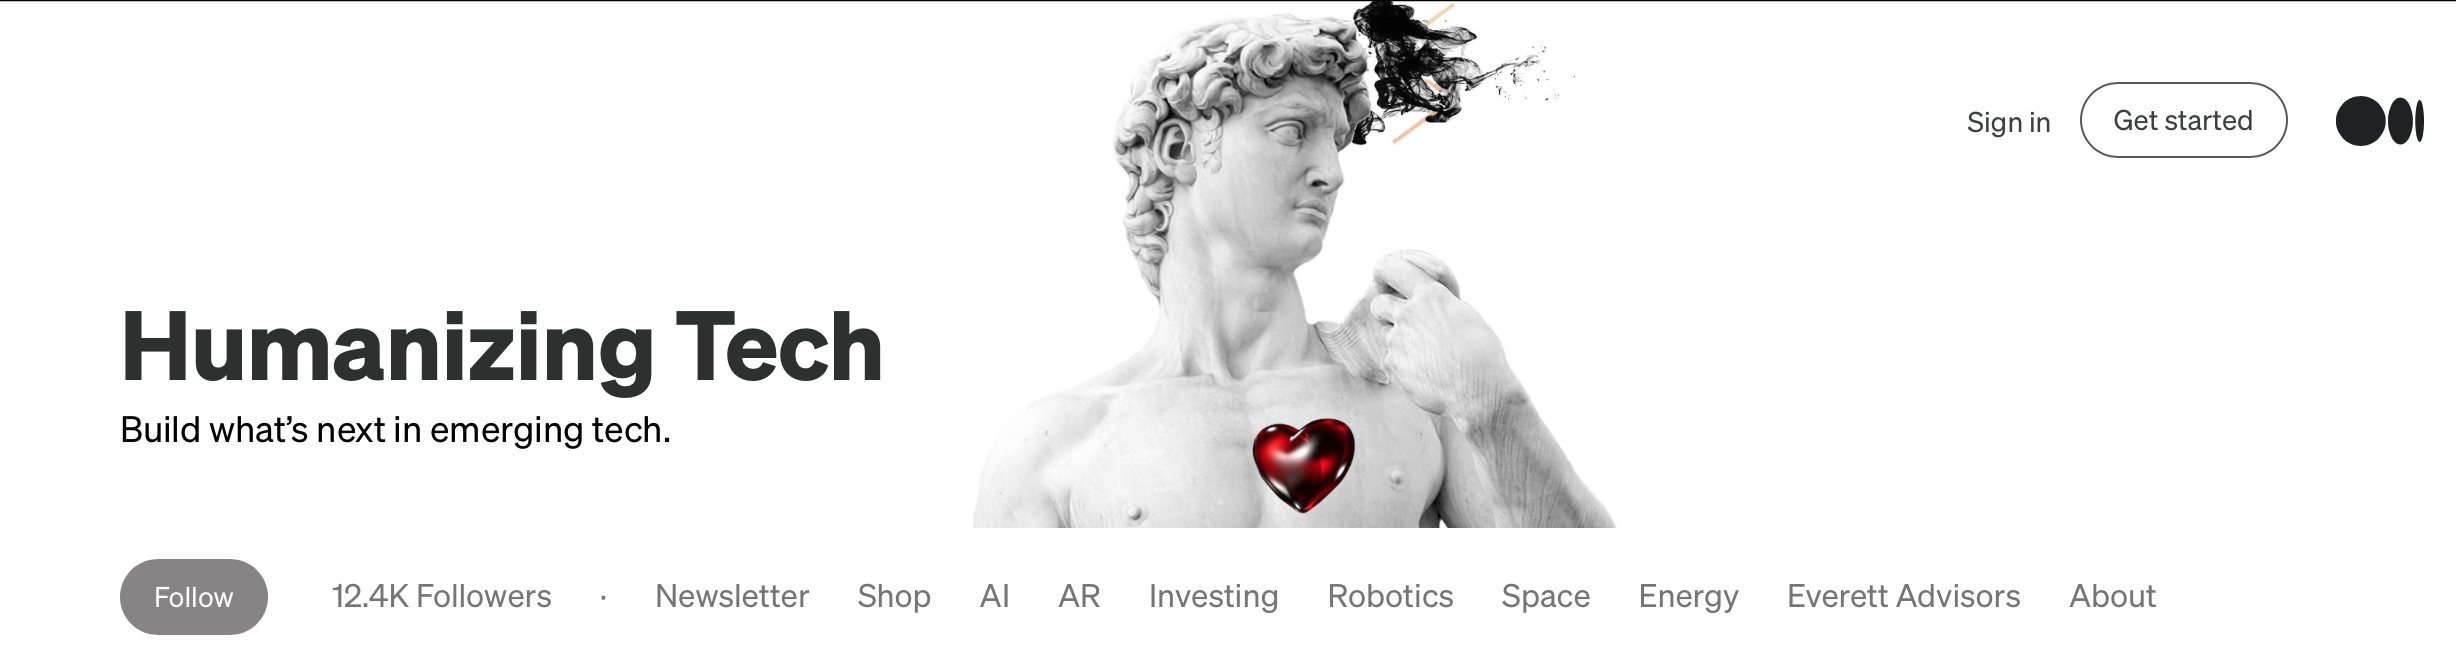
- get all article links from medium blog about technology
- scrape the text of each article
- create the list if articles text

In [2]:
def get_articles_list(url, strat_link):
    link_article = []
    unique_links = set()
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'lxml')
    link = soup.find_all("a", rel='noopener')
    for href in link:
      href = re.findall('href=\"(/.+readmore.+\-+\d+-+)\"\s', str(href))
      link_article.append(href)
    links = [link_text for link in link_article for link_text in link if len(link)>0]
    for link in links:
      full_link = start_link+str(link)
      unique_links.add(full_link)
    return unique_links

In [3]:
url = 'https://humanizing.tech/tagged/robotics'
start_link = 'https://humanizing.tech'
get_articles_list(url, start_link)

{'https://humanizing.tech/ai-chips-chinas-robotics-dbabca19a7a0?readmore=1&amp;source=collection_tagged---------5----------------------------',
 'https://humanizing.tech/artificial-biologic-systems-including-genomes-96645fb17bd5?readmore=1&amp;source=collection_tagged---------9----------------------------',
 'https://humanizing.tech/biorobotics-exists-today-fa58d5537c26?readmore=1&amp;source=collection_tagged---------2----------------------------',
 'https://humanizing.tech/hacking-human-behavior-4a5cf5be0f7e?readmore=1&amp;source=collection_tagged---------0----------------------------',
 'https://humanizing.tech/metal-asteroids-super-gpus-6c49bc88be66?readmore=1&amp;source=collection_tagged---------3----------------------------',
 'https://humanizing.tech/sensors-for-smart-robotics-iot-ed8a46aec476?readmore=1&amp;source=collection_tagged---------6----------------------------',
 'https://humanizing.tech/the-coming-gold-rush-of-space-manufacturing-601d9c2dd8b6?readmore=1&amp;source=coll

In [4]:
def get_article_text(url_list):
  text_article = []
  for link in url_list:
    whole_text = ''
    response = requests.get(link)
    soup = BeautifulSoup(response.text, 'lxml')
    text = soup.find_all("li")
    for t in text:
      whole_text = whole_text+'\n'+t.text
    textp = soup.find_all("p")
    for t in textp:
      whole_text = whole_text+'\n'+t.text
    text_article.append(whole_text)
  return text_article

In [5]:
url_list = get_articles_list(url, start_link)
texts = get_article_text(url_list)

In [6]:
print(texts[0])
print(texts[1])


Wired reports on a trend we’ve been seeing as well, that companies are building custom computer chips ideal for running mathemtic Deep Learning optimizations.
Bloomberg reports on China’s rush to build the robotics of the future because they see it as a stepping stone to the real gold rush of the future: AI, self-driving, IoT, etc.
Fountainhead
Tech
Robotics
Artificial Intelligence
Software Development
Sign in
This is an email from Emerging Tech Briefing, a newsletter by Humanizing Tech.
Sean M Everett
Apr 25, 2017·3 min read
There are two stories out today that you should be aware of:
Regarding the computer chips, we’ve previously shared the early Nervana go to market deck before they were acquired by Intel. Google also custom built it’s own TPU to work whether with TensorFlow. Some of those engineers left to start their own custom chip for AI startup. And then there’s IBM, Qualcomm, and of course NVIDIA.
But the one thing you have to remember from all of this is that even though it 

# 3) Text preparation:
- Delete all non-litteral characters
- Delete stop-words
- Get lemma for each word
- Create the list of unigrams
- Create the list of bigrams
(such approach let us find more technology terms)

In [7]:
def text_preparation(text):
    unigram_list = []
    bigram_list = []
    regex=re.compile('[^A-Z a-z]')
    lemmatizer = WordNetLemmatizer()
    cleaned_text = regex.sub(' ',text)
    unigram_list = word_tokenize(cleaned_text.lower())
    unigram_list = [lemmatizer.lemmatize(word) for word in unigram_list if word not in stopwords]
    bigram_list = list(nltk.bigrams(unigram_list))
    bigram_list = [pair[0]+'_'+pair[1] for pair in bigram_list]
    return unigram_list, bigram_list

In [8]:
for article in texts:
  unigram_list, bigram_list = text_preparation(article)
  print(unigram_list)
  print(bigram_list)

['wired', 'report', 'trend', 'seeing', 'well', 'company', 'building', 'custom', 'computer', 'chip', 'ideal', 'running', 'mathemtic', 'deep', 'learning', 'optimization', 'bloomberg', 'report', 'china', 'rush', 'build', 'robotics', 'future', 'see', 'stepping', 'stone', 'real', 'gold', 'rush', 'future', 'ai', 'self', 'driving', 'iot', 'etc', 'fountainhead', 'tech', 'robotics', 'artificial', 'intelligence', 'software', 'development', 'sign', 'email', 'emerging', 'tech', 'briefing', 'newsletter', 'humanizing', 'tech', 'sean', 'everett', 'apr', 'min', 'read', 'two', 'story', 'today', 'aware', 'regarding', 'computer', 'chip', 'previously', 'shared', 'early', 'nervana', 'go', 'market', 'deck', 'acquired', 'intel', 'google', 'also', 'custom', 'built', 'tpu', 'work', 'whether', 'tensorflow', 'engineer', 'left', 'start', 'custom', 'chip', 'ai', 'startup', 'ibm', 'qualcomm', 'course', 'nvidia', 'one', 'thing', 'remember', 'even', 'though', 'represents', 'market', 'view', 'ai', 'today', 'without', 

# 4) Collecting words from the text that are hyponyms for the words: 
`['technology', 'engineering', 'engineering', 'high_technology', 'computerization','rail_technology', 'automation', 'digital_communications_technology', 'condition','communications_technology', 'equipment','automotive_technology', 'aeronautical_engineering','computer_technology', 'rail_technology', 'high_tech','information_technology', 'IT', 'automotive_engineering', 'chemical_engineering', 'railroading', 'ecotechnology', ' technique']`

In [9]:
def creation_tech_dict(hypernym_list):
  technology_list = []
  for word in hypernym_list:
    hypernym = wn.synsets(word, wn.NOUN)
    for synset in hypernym:
      technology_list.append(list(set([w for s in synset.closure(lambda s:s.hyponyms()) for w in s.lemma_names()])))
  tech_dictionary = [word for elem in technology_list for word in elem]
  unique_words = set(tech_dictionary)
  print('dictionary length: ', len(unique_words))
  return unique_words

In [10]:
hypernym_list = ['technology', 'engineering', 'high_technology', 'computerization',
                 'rail_technology', 'automation', 'digital_communications_technology',
                 'equipment','automotive_technology', 'aeronautical_engineering',
                 'computer_technology', 'rail_technology', 'high_tech', 'information_technology', 'IT',
                 'automotive_engineering', 'chemical_engineering', 'railroading', 'ecotechnology',
                 'technique', 'operating_system', 'computer', 'science', 'robotics']
print(list(creation_tech_dict(hypernym_list))[:50])

dictionary length:  1481
['golf_tee', 'probability_theory', 'emergency_medicine', 'lens', 'elliptic_geometry', 'barbell', 'UNIX', 'material', 'gas_bracket', 'mashie_niblick', 'microfiche', 'printer', 'metamathematics', 'apishamore', 'medical_science', 'naval_radar', 'layette', 'quantum_mechanics', 'pilot', 'palaeontology', 'bubblejet', 'laptop', 'bacteriology', 'immunopathology', 'thermochemistry', 'drilling_rig', 'portrait_camera', 'cellphone', 'pharmacogenetics', 'polo_mallet', 'king', 'forestry', 'target', 'pilot_light', 'emulation', 'tool_kit', 'Assyriology', 'mobile_phone', 'computer_technology', 'haematology', 'cricket_ball', 'cosmogeny', 'limnology', 'pediatrics', 'mechanics', 'affine_geometry', 'ritualism', 'tomograph', 'magnetohydrodynamics', 'space_vehicle']


In [21]:
def extract_tech_terms(unigram_words, bigram_words, tech_dict):
  text_tech_words = []
  tech_dict = tech_dict
  global number_of_terms

  for word in unigram_words: 
    if word in tech_dict:
      text_tech_words.append(wn.synsets(word, wn.NOUN)[0])
    for synset in wn.synsets(word, wn.NOUN):
      for hypernym in synset.hypernyms():
        for lemma in hypernym.lemma_names():
          if lemma in tech_dict or hypernym.lemma_names() in hypernym_list:
            text_tech_words.append(hypernym)
    for synset in wn.synsets(word, wn.NOUN):
      for hyponym in synset.hyponyms():
        for lemma in hyponym.lemma_names():
          if lemma in tech_dict or hyponym.lemma_names() in hypernym_list:
            text_tech_words.append(hyponym)

  for word in bigram_words:
    if word in tech_dict:
        text_tech_words.append(wn.synsets(word, wn.NOUN)[0])
    for synset in wn.synsets(word, wn.NOUN):
      for hypernym in synset.hypernyms():
        for lemma in hypernym.lemma_names():
          if lemma in tech_dict or hypernym.lemma_names() in hypernym_list:
            text_tech_words.append(hypernym)
    for synset in wn.synsets(word, wn.NOUN):
      for hyponym in synset.hyponyms():
        for lemma in hyponym.lemma_names():
          if lemma in tech_dict or hyponym.lemma_names() in hypernym_list:
            text_tech_words.append(hyponym)

  text_tech_words = set(text_tech_words)
  number = len(text_tech_words)
  print('number of tech terms in text = ',len(text_tech_words))
  number_of_terms.append(number)
  print(list(text_tech_words)[:4])
  return text_tech_words

In [22]:
number_of_terms = []
for article in texts:
  unigram_list, bigram_list = text_preparation(article)
  tech_terms = list(extract_tech_terms(unigram_list, bigram_list,
                   creation_tech_dict(hypernym_list)))
  
aver_number_of_terms = round(sum(number_of_terms)/len(number_of_terms),2)
print("Average number of terms in texts: ", aver_number_of_terms)

dictionary length:  1481
number of tech terms in text =  112
[Synset('counter.n.02'), Synset('telephone.n.02'), Synset('undercut.n.05'), Synset('web_site.n.01')]
dictionary length:  1481
number of tech terms in text =  153
[Synset('counter.n.02'), Synset('web_site.n.01'), Synset('cognitive_psychology.n.01'), Synset('home_computer.n.01')]
dictionary length:  1481
number of tech terms in text =  78
[Synset('poll.n.01'), Synset('spike.n.07'), Synset('disk.n.01'), Synset('differential_psychology.n.01')]
dictionary length:  1481
number of tech terms in text =  194
[Synset('weather_satellite.n.01'), Synset('poll.n.01'), Synset('architectonics.n.01'), Synset('shot.n.15')]
dictionary length:  1481
number of tech terms in text =  79
[Synset('counter.n.02'), Synset('sequence.n.03'), Synset('nose.n.03'), Synset('homo.n.02')]
dictionary length:  1481
number of tech terms in text =  172
[Synset('spike.n.07'), Synset('disk.n.01'), Synset('undercut.n.05'), Synset('down.n.05')]
dictionary length:  148

# 5) Measure semantic similarity between extracted tech terms using Reznik metric.

Determination of the semantic proximity of two concepts according to the Reznik method.

# simresnik(c1,c2) =IC(LCS (C1, C2))= - log P(LCS(c1,c2))

**LCS (c1, c2)** is the least common superior of two concepts c1 and c2 in the network WordNet.

**IC (c) (information content)** is defined as the probability of encountering a certain concept with in a large corpus - P (c).

**P (c)** is the probability that a randomly selected word in the corpus is an example of the concept c. This probability is calculated as the sum of all words that are children of the given concept c, normalized by the number of words in the corpus.

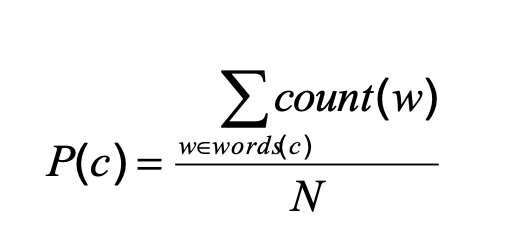

In [23]:
def reznik_sim_average(vocabulary, tech_terms):
  sim_scores = []
  for word1 in list(tech_terms):
    for word2 in list(tech_terms):
      if word1 != word2:
        lcs = word1.lowest_common_hypernyms(word2)
        hypernym = lcs[0]
        hyponym = hypernym.hyponyms()
        ic = (len(sorted(lemma.name() for w in hyponym for lemma in w.lemmas()))/len(vocabulary))
        resnik = -math.log(ic)
        sim_scores.append(round(resnik,2))
  average_sim = round(sum(sim_scores)/len(sim_scores),2)
  return average_sim

In [24]:
for article in texts:
  unigram_list, bigram_list = text_preparation(article)
  tech_terms = list(extract_tech_terms(unigram_list, bigram_list,
                   creation_tech_dict(hypernym_list)))
  print('average similarity between tech terms in text is: ', reznik_sim_average(unigram_list, tech_terms))

dictionary length:  1481
number of tech terms in text =  112
[Synset('counter.n.02'), Synset('telephone.n.02'), Synset('undercut.n.05'), Synset('web_site.n.01')]
average similarity between tech terms in text is:  3.49
dictionary length:  1481
number of tech terms in text =  153
[Synset('counter.n.02'), Synset('web_site.n.01'), Synset('cognitive_psychology.n.01'), Synset('home_computer.n.01')]
average similarity between tech terms in text is:  3.27
dictionary length:  1481
number of tech terms in text =  78
[Synset('poll.n.01'), Synset('spike.n.07'), Synset('disk.n.01'), Synset('differential_psychology.n.01')]
average similarity between tech terms in text is:  3.12
dictionary length:  1481
number of tech terms in text =  194
[Synset('weather_satellite.n.01'), Synset('poll.n.01'), Synset('architectonics.n.01'), Synset('shot.n.15')]
average similarity between tech terms in text is:  4.27
dictionary length:  1481
number of tech terms in text =  79
[Synset('counter.n.02'), Synset('sequence.